# EDA on flights

In [4]:
import pandas as pd
from sql_functions import get_dataframe
import matplotlib.pyplot as plt
import numpy as np

In [2]:
schema = 'cgn_analytics_23_2'
airports_df = get_dataframe(f'SELECT * FROM {schema}.flights_g1_clean')

In [3]:
airports_df.head()

,flight_date,airline,tail_number,flight_number,origin,dest,distance,cancelled,diverted,dep_time_t,sched_dep_time_t,dep_delay_t,arr_time_t,sched_arr_time_t,arr_delay_t,air_time_t,actual_elapsed_time_t
0,2017-09-10,AA,N813AA,1942,JAX,CLT,328.0,1,0,None,06:50:00,None,None,08:21:00,None,None,None
1,2017-09-10,AA,N819AA,1958,JAX,CLT,328.0,1,0,None,13:50:00,None,None,15:16:00,None,None,None
2,2017-09-10,AA,None,2012,CLT,MCO,468.0,1,0,None,22:20:00,None,None,23:57:00,None,None,None
3,2017-09-09,AA,None,2015,CLT,PBI,590.0,1,0,None,20:11:00,None,None,22:00:00,None,None,None
4,2017-09-11,AA,N704AA,2031,JAX,CLT,328.0,1,0,None,09:00:00,None,None,10:26:00,None,None,None


In [4]:
# create df with only cancelled flights in aug & sep of all airports
airports_can_df = airports_df.query('cancelled == 1')
airports_can_df.head()

,flight_date,airline,tail_number,flight_number,origin,dest,distance,cancelled,diverted,dep_time_t,sched_dep_time_t,dep_delay_t,arr_time_t,sched_arr_time_t,arr_delay_t,air_time_t,actual_elapsed_time_t
0,2017-09-10,AA,N813AA,1942,JAX,CLT,328.0,1,0,None,06:50:00,None,None,08:21:00,None,None,None
1,2017-09-10,AA,N819AA,1958,JAX,CLT,328.0,1,0,None,13:50:00,None,None,15:16:00,None,None,None
2,2017-09-10,AA,None,2012,CLT,MCO,468.0,1,0,None,22:20:00,None,None,23:57:00,None,None,None
3,2017-09-09,AA,None,2015,CLT,PBI,590.0,1,0,None,20:11:00,None,None,22:00:00,None,None,None
4,2017-09-11,AA,N704AA,2031,JAX,CLT,328.0,1,0,None,09:00:00,None,None,10:26:00,None,None,None


In [5]:
# count all cancelled flights in aug & sep of all airports
airports_can_df['flight_date'].count()

12036

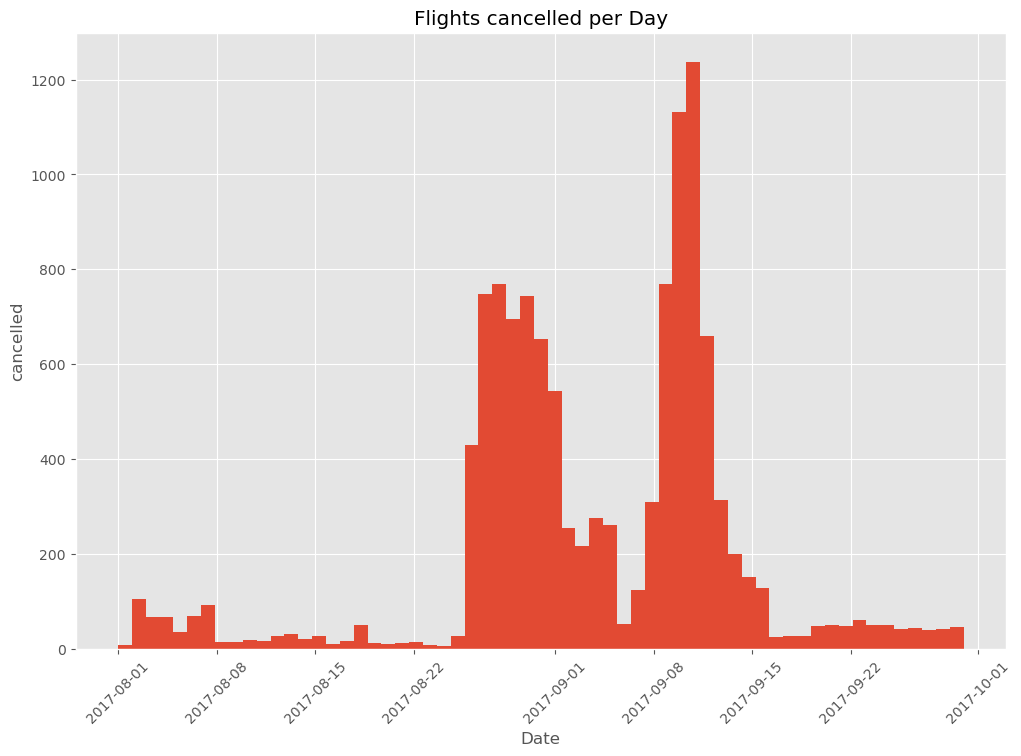

In [6]:
# create histogram of all cancelled flights in aug & sep of all airports

# Use predefined style ggplot
plt.style.use('ggplot') 

# Set figure size
plt.figure(figsize=(12, 8))

# Create histogram by specifying x-value
plt.hist(x = airports_can_df['flight_date'], bins=61)

plt.xticks(rotation=45)

# Label your axes
plt.xlabel("Date")
plt.ylabel("cancelled")

# Set title
plt.title("Flights cancelled per Day")

# Show graphic
plt.show()

In [7]:
airports=['IAH', 'DFW', 'MCO', 'MIA', 'MSY', 'CLT']

In [8]:
#create dataframe of cancelled flights for individual airports

for ap in airports:
    exec(f'{ap}_can_df = airports_can_df.query("origin == \'{ap}\' or dest == \'{ap}\'")')
#HOU_can_df = airports_can_df.query(f'origin == {ap} or dest == {ap}')

In [9]:
#create count of cancelled flights for individual airports
for ap in airports:
    exec(f'print(\'{ap}\', {ap}_can_df["flight_date"].count())')

IAH 5645
DFW 1011
MCO 2946
MIA 2277
MSY 575
CLT 850


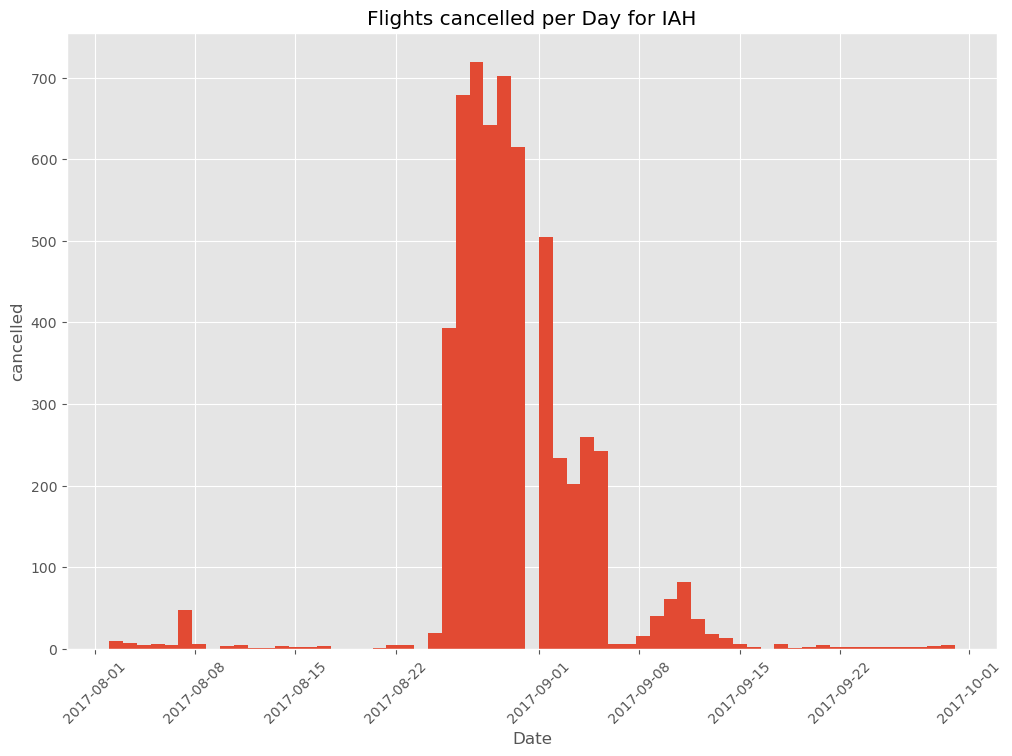

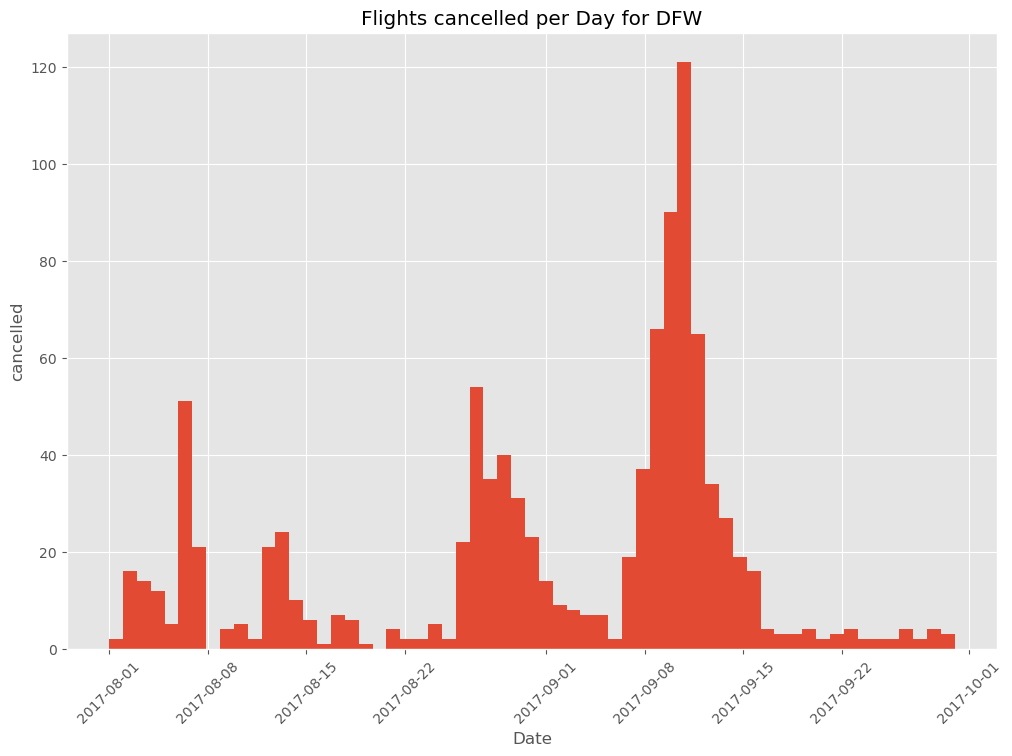

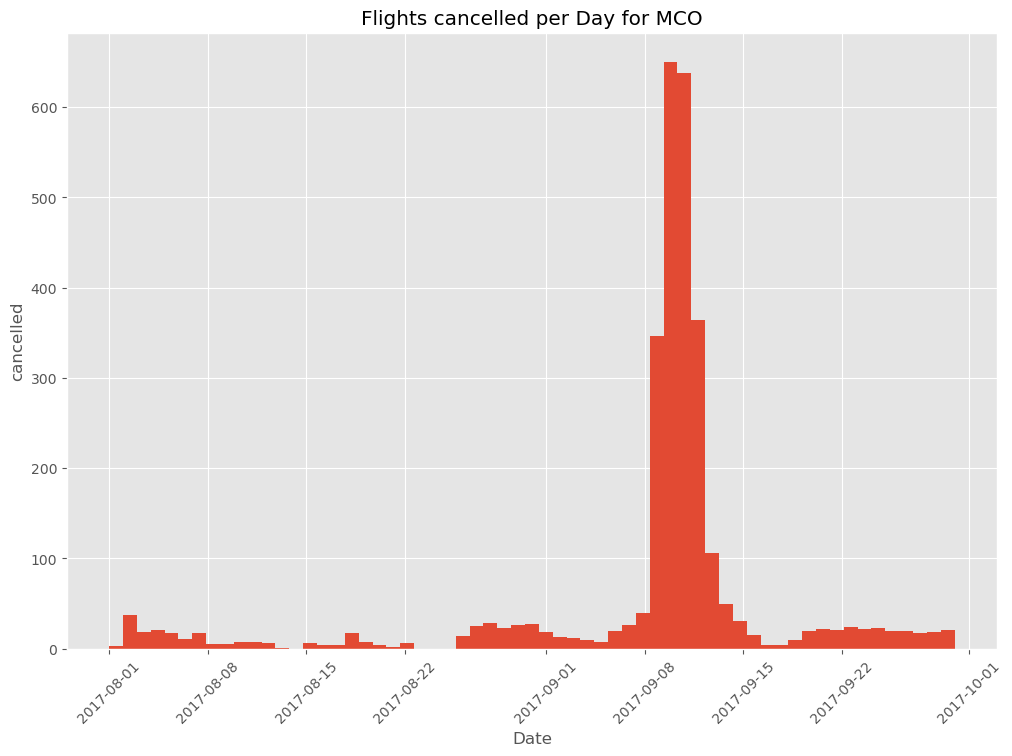

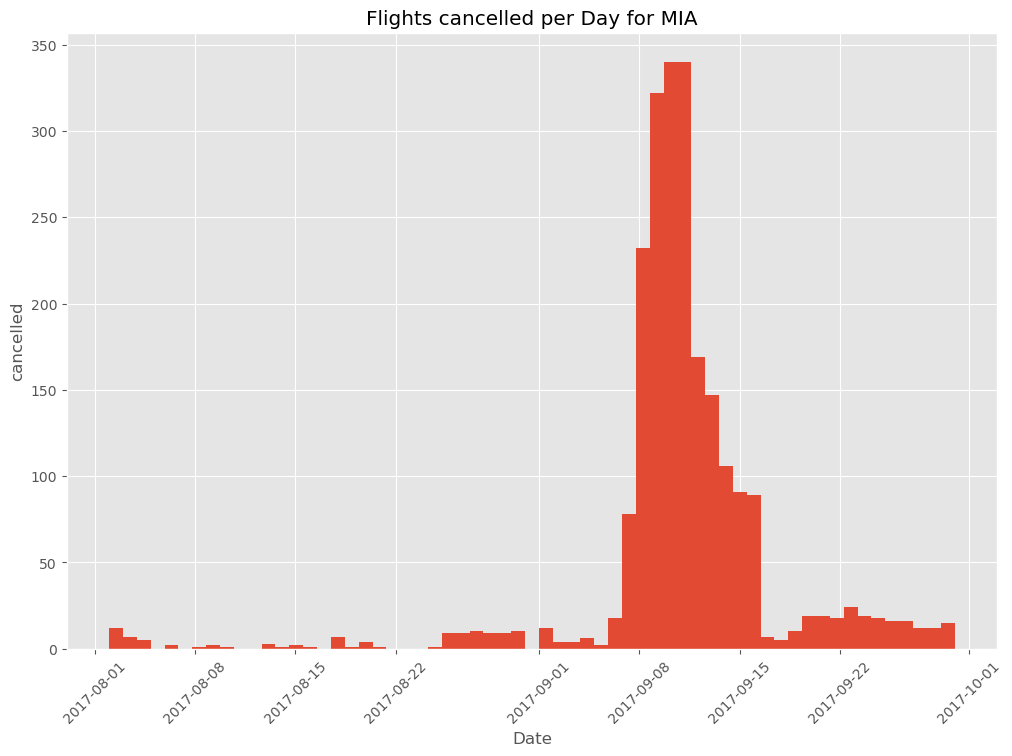

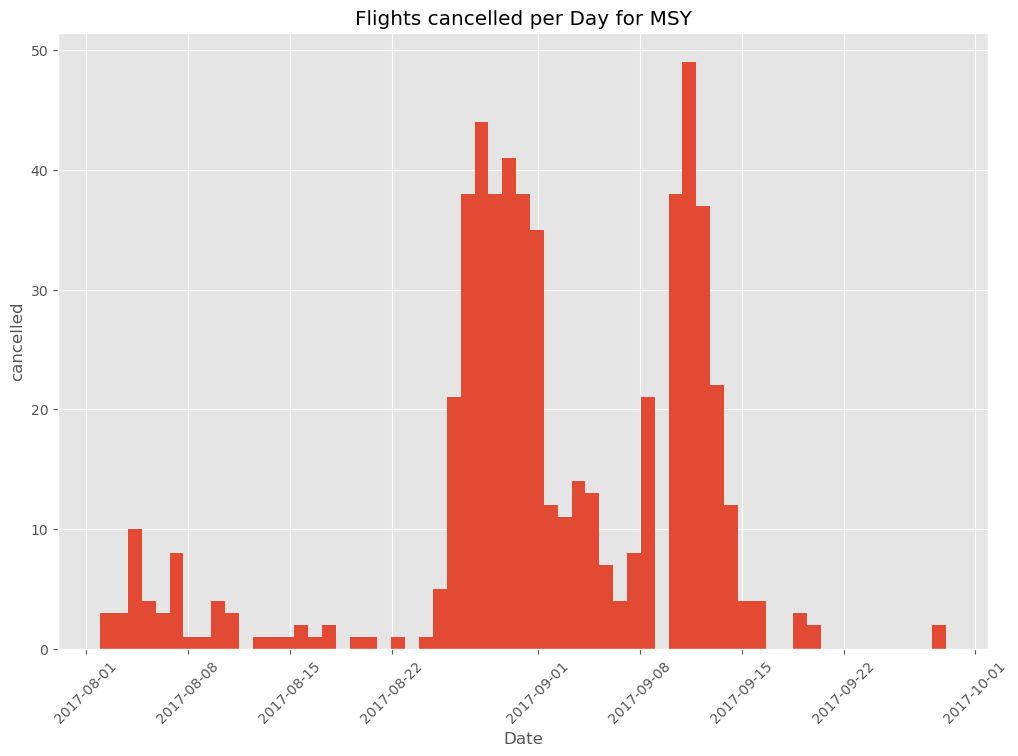

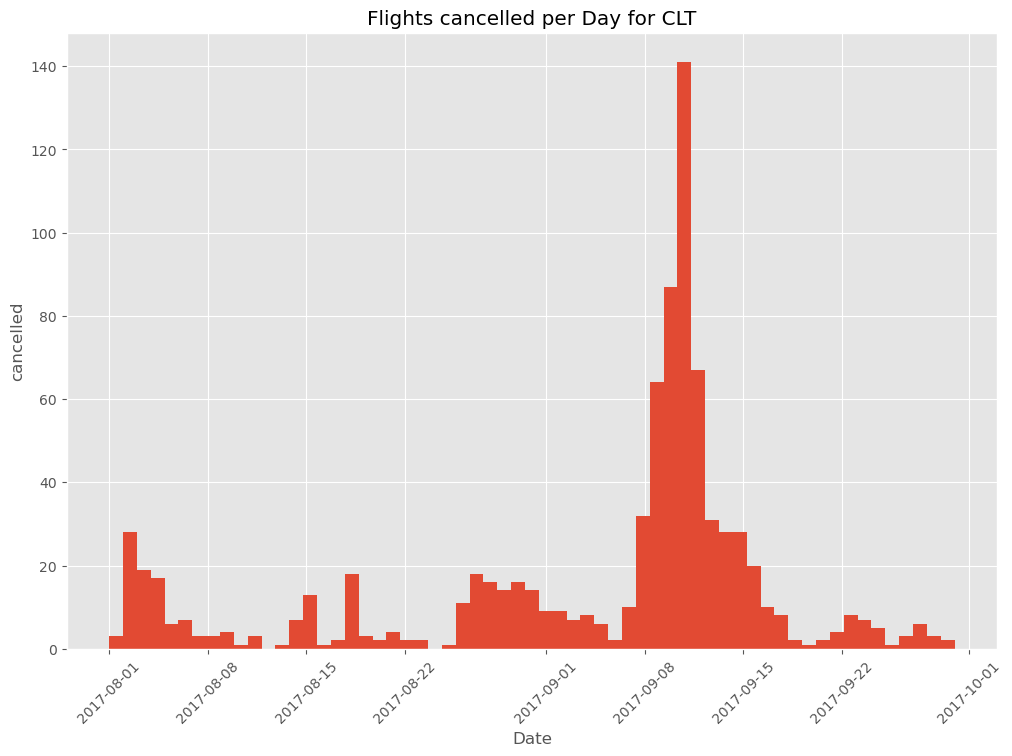

In [10]:
#create histograms of cancelled flights for individual airports
for ap in airports:
    exec(f'plt.style.use("ggplot")\nplt.figure(figsize=(12, 8))\nplt.hist(x = {ap}_can_df["flight_date"], bins=61)\nplt.xticks(rotation=45)\nplt.xlabel("Date")\nplt.ylabel("cancelled")\nplt.title("Flights cancelled per Day for {ap}")\n')
plt.show()

In [32]:
df_MSY_origin = airports_can_df[airports_can_df['origin'] == 'MSY']
df_MSY_origin.head(2)

,flight_date,airline,tail_number,flight_number,origin,dest,distance,cancelled,diverted,dep_time_t,sched_dep_time_t,dep_delay_t,arr_time_t,sched_arr_time_t,arr_delay_t,air_time_t,actual_elapsed_time_t
917,2017-08-18,B6,N508JB,576,MSY,JFK,1182.0,1,0,None,17:44:00,None,None,21:57:00,None,None,None
1024,2017-08-29,WN,None,1592,MSY,HOU,302.0,1,0,None,18:50:00,None,None,20:00:00,None,None,None


/var/folders/l0/mwtmdpdj3f7_htr_n6695cgm0000gn/T/ipykernel_1600/121723398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSY_origin['flight_date'] = pd.to_datetime(df_MSY_origin['flight_date'])


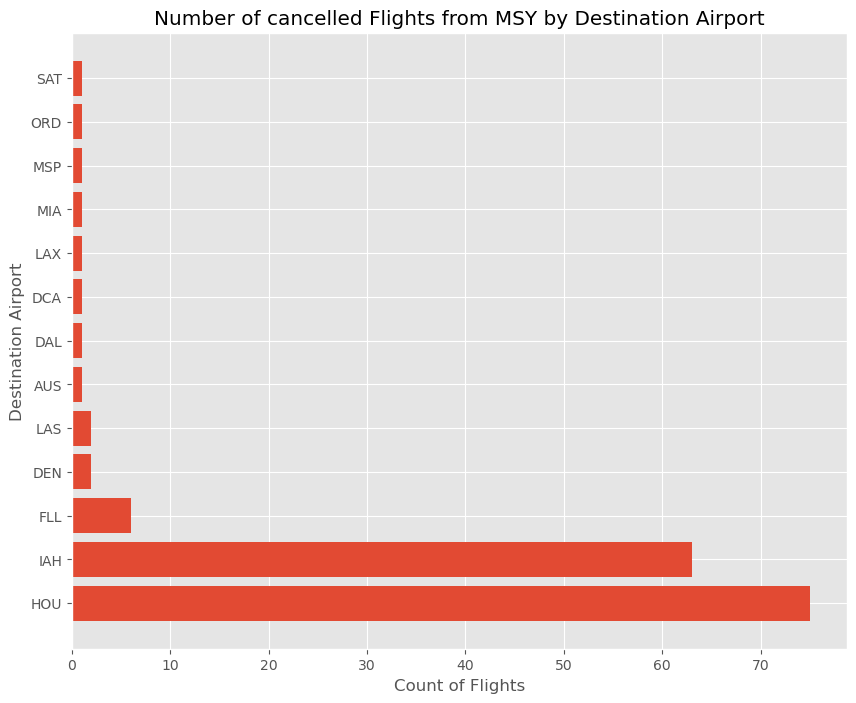

In [33]:

import matplotlib.pyplot as plt

# Convert the "flight_date" column to datetime if it's not already in datetime format
df_MSY_origin['flight_date'] = pd.to_datetime(df_MSY_origin['flight_date'])

# Filter the DataFrame based on the flight dates within the desired time period
filtered_df = df_MSY_origin[
    (df_MSY_origin['flight_date'] >= pd.Timestamp('2017-08-24')) &
    (df_MSY_origin['flight_date'] <= pd.Timestamp('2017-09-06'))
]

# Group the data by destination airport and count the occurrences
grouped_df = filtered_df.groupby('dest').size().reset_index(name='count').sort_values('count', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(grouped_df['dest'], grouped_df['count'])

ax.set_title('Number of cancelled Flights from MSY by Destination Airport')
ax.set_xlabel('Count of Flights')
ax.set_ylabel('Destination Airport')

plt.show()

# Get weather data with API

In [12]:
import requests
import json

In [ ]:
#Check the Dataframe
df_api

In [18]:
#Normalize JSON request and save in new variable
df_api_neu = pd.json_normalize(df_api,
                               record_path='data'
                               )

In [20]:
df_api_neu

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2017-08-01 00:00:00,31.7,18.0,44.0,0.0,None,100.0,18.4,None,1014.1,None,NaN
1,2017-08-01 01:00:00,30.6,17.3,45.0,0.0,None,90.0,16.6,None,1014.5,None,NaN
2,2017-08-01 02:00:00,26.7,17.8,58.0,0.0,None,100.0,11.2,None,1014.7,None,NaN
3,2017-08-01 03:00:00,26.1,17.7,60.0,0.0,None,NaN,9.4,None,1015.1,None,NaN
4,2017-08-01 04:00:00,25.6,18.3,64.0,0.0,None,NaN,5.4,None,1015.2,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-08-31 19:00:00,32.2,18.4,44.0,0.0,None,310.0,14.8,None,1012.8,None,NaN
740,2017-08-31 20:00:00,32.2,18.8,45.0,0.0,None,340.0,14.8,None,1012.1,None,NaN
741,2017-08-31 21:00:00,33.3,17.9,40.0,0.0,None,320.0,20.5,None,1011.6,None,NaN
742,2017-08-31 22:00:00,32.8,17.0,39.0,0.0,None,330.0,20.5,None,1011.6,None,NaN


In [ ]:
# Pull data from weather API for August

import pandas as pd
import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"
headers = {
    "X-RapidAPI-Key": "your_key",
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

station_ids = ["72243", "72259", "72205", "72202", "72231", "72314"]

data_frames = []  # List to store the individual DataFrames

for station_id in station_ids:
    querystring = {
        "station": station_id,
        "start": "2017-08-01",
        "end": "2017-08-31"
    }

    response = requests.get(url, headers=headers, params=querystring)

    # Check if the request was successful
    if response.status_code == 200:
        # Store the JSON response in a variable
        data = response.json()
        
        # Extract the 'data' field from the JSON response
        data = data.get('data', [])
        
        # Create a DataFrame from the data
        df = pd.DataFrame(data)

        # Add a new column 'station_id' with the current station ID
        df['station_id'] = station_id
        
        # Append the DataFrame to the list
        data_frames.append(df)
    else:
        print(f"Error occurred while retrieving data for station ID: {station_id}")

# Concatenate the individual DataFrames into a single DataFrame
df_combined = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
print(df_combined)

In [22]:
#Check df_combined
df_combined

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,station_id
0,2017-08-01 00:00:00,31.7,18.0,44.0,0.0,None,100.0,18.4,None,1014.1,None,NaN,72243
1,2017-08-01 01:00:00,30.6,17.3,45.0,0.0,None,90.0,16.6,None,1014.5,None,NaN,72243
2,2017-08-01 02:00:00,26.7,17.8,58.0,0.0,None,100.0,11.2,None,1014.7,None,NaN,72243
3,2017-08-01 03:00:00,26.1,17.7,60.0,0.0,None,NaN,9.4,None,1015.1,None,NaN,72243
4,2017-08-01 04:00:00,25.6,18.3,64.0,0.0,None,NaN,5.4,None,1015.2,None,NaN,72243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2017-08-31 19:00:00,33.9,22.7,52.0,0.0,None,150.0,11.2,None,1016.2,None,NaN,72205
2228,2017-08-31 20:00:00,33.9,22.7,52.0,0.0,None,190.0,9.4,None,1015.3,None,NaN,72205
2229,2017-08-31 21:00:00,33.3,24.5,60.0,0.0,None,100.0,20.5,None,1015.0,None,NaN,72205
2230,2017-08-31 22:00:00,32.8,24.0,60.0,0.0,None,100.0,18.4,None,1014.7,None,25.0,72205


In [ ]:
# Pull data from weather API for SEPTEMBER

import time
import pandas as pd
import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"
headers = {
    "X-RapidAPI-Key": "your_key",
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

station_ids = ["72243", "72259", "72205", "72202", "72231", "72314"]

data_frames = []  # List to store the individual DataFrames

for station_id in station_ids:
    querystring = {
        "station": station_id,
        "start": "2017-09-01",
        "end": "2017-09-30"
    }

    response = requests.get(url, headers=headers, params=querystring)

    time.sleep(1) #uncomment if you run into a query limit

    # Check if the request was successful
    if response.status_code == 200:
        # Store the JSON response in a variable
        data = response.json()
        
        # Extract the 'data' field from the JSON response
        data = data.get('data', [])
        
        # Create a DataFrame from the data
        df = pd.DataFrame(data)

        # Add a new column 'station_id' with the current station ID
        df['station_id'] = station_id
        
        # Append the DataFrame to the list
        data_frames.append(df)
    else:
        print(f"Error occurred while retrieving data for station ID: {station_id}")

# Concatenate the individual DataFrames into a single DataFrame
df_combined2 = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
print(df_combined2)

In [24]:
# Display output of August and September dataframes
# df_combined
df_combined2

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,station_id
0,2017-09-01 00:00:00,30.0,16.1,43.0,0.0,None,350.0,18.4,None,1012.1,None,NaN,72259
1,2017-09-01 01:00:00,28.3,16.2,48.0,0.0,None,350.0,14.8,None,1012.2,None,NaN,72259
2,2017-09-01 02:00:00,27.8,16.1,49.0,0.0,None,350.0,14.8,None,1012.9,None,NaN,72259
3,2017-09-01 03:00:00,26.1,17.2,58.0,0.0,None,360.0,11.2,None,1013.7,None,NaN,72259
4,2017-09-01 04:00:00,25.0,17.7,64.0,0.0,None,360.0,11.2,None,1014.1,None,NaN,72259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2017-09-30 19:00:00,26.1,9.0,34.0,0.0,None,10.0,16.6,None,1021.0,None,NaN,72314
3596,2017-09-30 20:00:00,26.1,8.1,32.0,0.0,None,10.0,16.6,None,1020.7,None,NaN,72314
3597,2017-09-30 21:00:00,26.1,6.2,28.0,0.0,None,20.0,22.3,None,1020.9,None,NaN,72314
3598,2017-09-30 22:00:00,23.9,5.7,31.0,0.0,None,10.0,14.8,None,1021.3,None,NaN,72314


In [25]:
# Concat August and September dataframes
meteostat_g1 = pd.concat([df_combined, df_combined2])

In [26]:
meteostat_g1

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,station_id
0,2017-08-01 00:00:00,31.7,18.0,44.0,0.0,None,100.0,18.4,None,1014.1,None,NaN,72243
1,2017-08-01 01:00:00,30.6,17.3,45.0,0.0,None,90.0,16.6,None,1014.5,None,NaN,72243
2,2017-08-01 02:00:00,26.7,17.8,58.0,0.0,None,100.0,11.2,None,1014.7,None,NaN,72243
3,2017-08-01 03:00:00,26.1,17.7,60.0,0.0,None,NaN,9.4,None,1015.1,None,NaN,72243
4,2017-08-01 04:00:00,25.6,18.3,64.0,0.0,None,NaN,5.4,None,1015.2,None,NaN,72243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2017-09-30 19:00:00,26.1,9.0,34.0,0.0,None,10.0,16.6,None,1021.0,None,NaN,72314
3596,2017-09-30 20:00:00,26.1,8.1,32.0,0.0,None,10.0,16.6,None,1020.7,None,NaN,72314
3597,2017-09-30 21:00:00,26.1,6.2,28.0,0.0,None,20.0,22.3,None,1020.9,None,NaN,72314
3598,2017-09-30 22:00:00,23.9,5.7,31.0,0.0,None,10.0,14.8,None,1021.3,None,NaN,72314


![API_call_meteostat_parameters, https://dev.meteostat.net/api/stations/hourly.html#parameters](./data/API_call_meteostat_parameters.png)

# coco Weather Condition Codes:
# https://dev.meteostat.net/formats.html#weather-condition-codes

In [27]:
meteostat_g1.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
count,5804.000000,5804.000000,5804.000000,5490.000000,5296.000000,5804.000000,5786.000000,480.000000
mean,26.953601,21.316799,73.810131,0.330109,154.699773,12.003567,1014.257484,12.452083
std,4.060476,3.715997,18.079452,2.431697,104.263524,8.647042,3.788397,8.021487
min,11.700000,5.700000,20.000000,0.000000,10.000000,0.000000,981.000000,5.000000
25%,24.400000,19.500000,60.000000,0.000000,60.000000,7.600000,1012.300000,7.000000
50%,26.700000,22.700000,75.000000,0.000000,150.000000,11.200000,1014.500000,7.500000
75%,30.000000,23.900000,90.000000,0.000000,210.000000,16.600000,1016.500000,25.000000
max,37.200000,27.900000,100.000000,50.500000,360.000000,87.100000,1027.400000,26.000000


In [28]:
meteostat_g1['temp'].unique()

array([31.7, 30.6, 26.7, 26.1, 25.6, 24.4, 23.9, 23.3, 27.2, 30. , 31.1,
       32.2, 33.9, 33.3, 32.8, 28.9, 27.8, 25. , 29.4, 28.3, 22.8, 35. ,
       36.1, 34.4, 35.6, 36.7, 22.2, 21.7, 37.2, 24. , 26. , 21.1, 20. ,
       19.4, 18.9, 18.3, 17.2, 16.1, 17.8, 20.6, 16.7, 23. , 33.8, 33.7,
       28. , 29. , 27. ,  nan, 33. , 33.1, 32. , 29.5, 28.8, 28.2, 15.6,
       15. , 14.4, 13.9, 13.3, 12.8, 12.2, 11.7, 30.5, 22. ])

In [29]:
meteostat_g1.drop(['dwpt','snow', 'wdir', 'tsun'], axis=1, inplace=True)

In [30]:
meteostat_g1

,time,temp,rhum,prcp,wspd,wpgt,pres,coco,station_id
0,2017-08-01 00:00:00,31.7,44.0,0.0,18.4,None,1014.1,NaN,72243
1,2017-08-01 01:00:00,30.6,45.0,0.0,16.6,None,1014.5,NaN,72243
2,2017-08-01 02:00:00,26.7,58.0,0.0,11.2,None,1014.7,NaN,72243
3,2017-08-01 03:00:00,26.1,60.0,0.0,9.4,None,1015.1,NaN,72243
4,2017-08-01 04:00:00,25.6,64.0,0.0,5.4,None,1015.2,NaN,72243
...,...,...,...,...,...,...,...,...,...
3595,2017-09-30 19:00:00,26.1,34.0,0.0,16.6,None,1021.0,NaN,72314
3596,2017-09-30 20:00:00,26.1,32.0,0.0,16.6,None,1020.7,NaN,72314
3597,2017-09-30 21:00:00,26.1,28.0,0.0,22.3,None,1020.9,NaN,72314
3598,2017-09-30 22:00:00,23.9,31.0,0.0,14.8,None,1021.3,NaN,72314


In [ ]:
# Push final dataframe as a table to database

# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
from sql_functions import get_engine
engine = get_engine()
schema = 'cgn_analytics_23_2'
table_name = 'meteostat_g1'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        meteostat_g1.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

# EDA on weather data

In [ ]:
#72243 Houston IAH for Sept 2017
import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"

querystring = {"station":"72243","start":"2017-09-01","end":"2017-09-30"}

headers = {
	"X-RapidAPI-Key": "your_key",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

In [ ]:
weather_IAH_09 = response.json()
print(weather_IAH_09)

In [36]:
# Flatten json and save in dataframe
weather_IAH_09 = pd.json_normalize(weather_IAH_09, sep='_')
(weather_IAH_09)


,data,meta_generated
0,"[{'time': '2017-09-01 00:00:00', 'temp': 31.7,...",2023-06-05 11:04:18


In [ ]:
weather_IAH_09_norm = pd.json_normalize(weather_IAH_09, record_path="data")

In [ ]:
#Advanced flattering with json_normalize()
weather_IAH_09_norm = pd.json_normalize(weather_IAH_09,
                                   record_path="data")
(weather_IAH_09_norm)



In [ ]:
#SC9N0 Houston HOU for Sept 2017
import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"

querystring = {"station":"SC9N0","start":"2017-09-01","end":"2017-09-30"}

headers = {
	"X-RapidAPI-Key": "your_key",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())


In [ ]:
#HOU SC9N0 - no data!!!
weather_HOU_09 = response.json()
print(weather_HOU_09)

DFW DALLAS

In [ ]:
#72259 DFW Dallas for Sept
import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"

querystring = {"station":"72259","start":"2017-09-01","end":"2017-09-30"}

headers = {
	"X-RapidAPI-Key": "your_key",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

In [ ]:
weather_DFW_09 = response.json()
print(weather_DFW_09)

In [44]:
weather_DFW_09_norm = pd.json_normalize(weather_DFW_09,
                                   record_path="data")
(weather_DFW_09_norm)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2017-09-01 00:00:00,30.0,16.1,43.0,0.0,None,350.0,18.4,None,1012.1,None,NaN
1,2017-09-01 01:00:00,28.3,16.2,48.0,0.0,None,350.0,14.8,None,1012.2,None,NaN
2,2017-09-01 02:00:00,27.8,16.1,49.0,0.0,None,350.0,14.8,None,1012.9,None,NaN
3,2017-09-01 03:00:00,26.1,17.2,58.0,0.0,None,360.0,11.2,None,1013.7,None,NaN
4,2017-09-01 04:00:00,25.0,17.7,64.0,0.0,None,360.0,11.2,None,1014.1,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2017-09-30 19:00:00,28.3,10.0,32.0,0.0,None,100.0,11.2,None,1019.2,None,NaN
716,2017-09-30 20:00:00,29.4,9.5,29.0,0.0,None,100.0,11.2,None,1018.1,None,NaN
717,2017-09-30 21:00:00,29.4,9.0,28.0,0.0,None,40.0,16.6,None,1017.1,None,NaN
718,2017-09-30 22:00:00,29.4,8.5,27.0,0.0,None,60.0,16.6,None,1016.6,None,NaN


MCO Orlando for Sept

In [ ]:
#72202 for Sept

import requests

url = "https://meteostat.p.rapidapi.com/stations/hourly"

querystring = {"station":"72202","start":"2017-09-01","end":"2017-09-30"}

headers = {
	"X-RapidAPI-Key": "your_key",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

In [ ]:
weather_72202 = response.json()
print(weather_72202)

In [48]:
weather_72202_norm = pd.json_normalize(weather_72202,
                                   record_path="data")
(weather_72202_norm)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2017-09-01 00:00:00,30.6,23.3,65.0,0.0,None,120.0,14.8,None,1015.5,None,NaN
1,2017-09-01 01:00:00,30.0,24.4,72.0,0.0,None,140.0,11.2,None,1016.6,None,NaN
2,2017-09-01 02:00:00,30.0,23.9,70.0,0.0,None,120.0,13.0,None,1017.1,None,NaN
3,2017-09-01 03:00:00,29.4,23.8,72.0,0.0,None,120.0,13.0,None,1017.4,None,NaN
4,2017-09-01 04:00:00,29.4,23.8,72.0,0.0,None,110.0,13.0,None,1017.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2017-09-30 19:00:00,31.7,24.3,65.0,0.0,None,150.0,16.6,None,1012.8,None,NaN
716,2017-09-30 20:00:00,31.1,24.5,68.0,0.0,None,130.0,18.4,None,1012.5,None,NaN
717,2017-09-30 21:00:00,30.6,24.5,70.0,0.0,None,150.0,7.6,None,1012.7,None,NaN
718,2017-09-30 22:00:00,30.0,24.4,72.0,0.0,None,150.0,11.2,None,1012.8,None,NaN


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
#Get the data from sql
schema = 'cgn_analytics_23_2'
meteostat_g1_df = get_dataframe(f'SELECT * FROM {schema}.meteostat_g1')

In [53]:
meteostat_g1_df.head(5)

,time,temp,rhum,prcp,wspd,wpgt,pres,coco,station_id,city
0,2017-09-11 07:00:00,NaN,NaN,0.0,NaN,None,1001.5,NaN,72202,Miami
1,2017-08-01 00:00:00,31.7,44.0,0.0,18.4,None,1014.1,NaN,72243,Houston
2,2017-08-01 01:00:00,30.6,45.0,0.0,16.6,None,1014.5,NaN,72243,Houston
3,2017-08-01 02:00:00,26.7,58.0,0.0,11.2,None,1014.7,NaN,72243,Houston
4,2017-08-01 03:00:00,26.1,60.0,0.0,9.4,None,1015.1,NaN,72243,Houston


In [54]:
#Add a new column date for visualizing
meteostat_g1_df['date'] = pd.to_datetime(meteostat_g1_df['time']).dt.date
meteostat_g1_df.head()

,time,temp,rhum,prcp,wspd,wpgt,pres,coco,station_id,city,date
0,2017-09-11 07:00:00,NaN,NaN,0.0,NaN,None,1001.5,NaN,72202,Miami,2017-09-11
1,2017-08-01 00:00:00,31.7,44.0,0.0,18.4,None,1014.1,NaN,72243,Houston,2017-08-01
2,2017-08-01 01:00:00,30.6,45.0,0.0,16.6,None,1014.5,NaN,72243,Houston,2017-08-01
3,2017-08-01 02:00:00,26.7,58.0,0.0,11.2,None,1014.7,NaN,72243,Houston,2017-08-01
4,2017-08-01 03:00:00,26.1,60.0,0.0,9.4,None,1015.1,NaN,72243,Houston,2017-08-01


In [55]:
# Group the data
# by Houston
df_houston = meteostat_g1_df[meteostat_g1_df['city'] == 'Houston']
df_houston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 1 to 5192
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        1464 non-null   object 
 1   temp        1464 non-null   float64
 2   rhum        1464 non-null   float64
 3   prcp        1408 non-null   float64
 4   wspd        1464 non-null   float64
 5   wpgt        0 non-null      object 
 6   pres        1462 non-null   float64
 7   coco        183 non-null    float64
 8   station_id  1464 non-null   object 
 9   city        1464 non-null   object 
 10  date        1464 non-null   object 
dtypes: float64(6), object(5)
memory usage: 137.2+ KB


In [56]:
#Group by Dallas
df_dallas = meteostat_g1_df[meteostat_g1_df['city'] == 'Dallas']
#Group by Orlando
df_orlando = meteostat_g1_df[meteostat_g1_df['city'] == 'Orlando']
#Group by Miami
df_miami = meteostat_g1_df[meteostat_g1_df['city'] == 'Miami']
#Group by New Orleans
df_orleans = meteostat_g1_df[meteostat_g1_df['city'] == 'New Orleans']
#Group by Charlotte
df_charlotte = meteostat_g1_df[meteostat_g1_df['city'] == 'Charlotte']

Create plots for weather: city wind & rain for August and September. Can we see the peaks or/and anomalies? 
Save the plots as png.

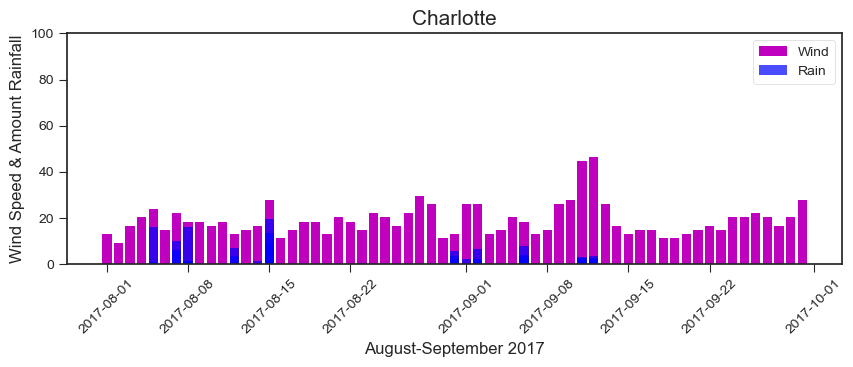

In [57]:
# Bar plot date and wind speed for Houston

# Use predefined style
plt.style.use('seaborn-v0_8-ticks') 

# Set figure size
plt.figure(figsize=(10, 3))

#Set city and df
city = 'Charlotte'
df = df_charlotte

# Create bar plot
plt.bar(df['date'], df['wspd'],
color = 'm',
label='Wind');
plt.bar(df['date'], df['prcp'],
color = 'b',
label='Rain',
alpha = 0.7);

# Label axes
plt.xlabel("August-September 2017", fontsize = 12)
plt.ylabel("Wind Speed & Amount Rainfall", fontsize = 12)
plt.ylim([0, 100])
plt.xticks(rotation=45)

# Set title
plt.title(city, fontsize = 15)

# Show graphic

plt.legend(loc='upper right', fontsize='medium', frameon=True)

We can identify anomalies in Houston from 26.08. untill 30.08.
Now we can check hourly weather history in this time. And than compare it with flights data.

In [58]:
#df_houston = meteostat_g1_df[meteostat_g1_df['city'] == 'Houston']

import datetime
start_date = datetime.date(2017, 8, 26)
end_date = datetime.date(2017, 8, 28)
df_h_harvey_1 = df_houston[(df_houston['date'] >= start_date) & (df_houston['date'] <= end_date)]
df_h_harvey_1

,time,temp,rhum,prcp,wspd,wpgt,pres,coco,station_id,city,date
602,2017-08-26 00:00:00,25.6,85.0,0.0,31.7,None,1009.6,NaN,72243,Houston,2017-08-26
603,2017-08-26 01:00:00,26.1,82.0,NaN,29.5,None,1009.6,7.0,72243,Houston,2017-08-26
604,2017-08-26 02:00:00,25.6,85.0,NaN,33.5,None,1009.5,7.0,72243,Houston,2017-08-26
605,2017-08-26 03:00:00,25.6,87.0,0.5,31.7,None,1010.3,7.0,72243,Houston,2017-08-26
606,2017-08-26 04:00:00,25.0,90.0,0.8,29.5,None,1010.2,NaN,72243,Houston,2017-08-26
...,...,...,...,...,...,...,...,...,...,...,...
669,2017-08-28 19:00:00,22.2,91.0,3.3,48.2,None,1005.0,8.0,72243,Houston,2017-08-28
670,2017-08-28 20:00:00,21.7,93.0,3.8,44.6,None,1005.2,9.0,72243,Houston,2017-08-28
671,2017-08-28 21:00:00,21.7,93.0,9.7,29.5,None,1005.0,NaN,72243,Houston,2017-08-28
672,2017-08-28 22:00:00,21.7,96.0,14.0,38.9,None,1005.1,9.0,72243,Houston,2017-08-28


In [59]:
import datetime
start_date = datetime.date(2017, 8, 29)
end_date = datetime.date(2017, 8, 31)
df_h_harvey_2 = df_houston[(df_houston['date'] >= start_date) & (df_houston['date'] <= end_date)]
df_h_harvey_2

,time,temp,rhum,prcp,wspd,wpgt,pres,coco,station_id,city,date
674,2017-08-29 00:00:00,22.2,93.0,8.4,37.1,None,1005.9,8.0,72243,Houston,2017-08-29
675,2017-08-29 01:00:00,22.2,93.0,5.3,29.5,None,1006.0,9.0,72243,Houston,2017-08-29
676,2017-08-29 02:00:00,22.2,93.0,5.8,31.7,None,1006.3,8.0,72243,Houston,2017-08-29
677,2017-08-29 03:00:00,22.8,90.0,4.3,33.5,None,1006.6,8.0,72243,Houston,2017-08-29
678,2017-08-29 04:00:00,22.8,90.0,1.8,31.7,None,1006.8,NaN,72243,Houston,2017-08-29
...,...,...,...,...,...,...,...,...,...,...,...
741,2017-08-31 19:00:00,32.2,44.0,0.0,14.8,None,1012.8,NaN,72243,Houston,2017-08-31
742,2017-08-31 20:00:00,32.2,45.0,0.0,14.8,None,1012.1,NaN,72243,Houston,2017-08-31
743,2017-08-31 21:00:00,33.3,40.0,0.0,20.5,None,1011.6,NaN,72243,Houston,2017-08-31
744,2017-08-31 22:00:00,32.8,39.0,0.0,20.5,None,1011.6,NaN,72243,Houston,2017-08-31


Now, we try to find a peaks in the period from 26.08.-31.08.2017 in Houston

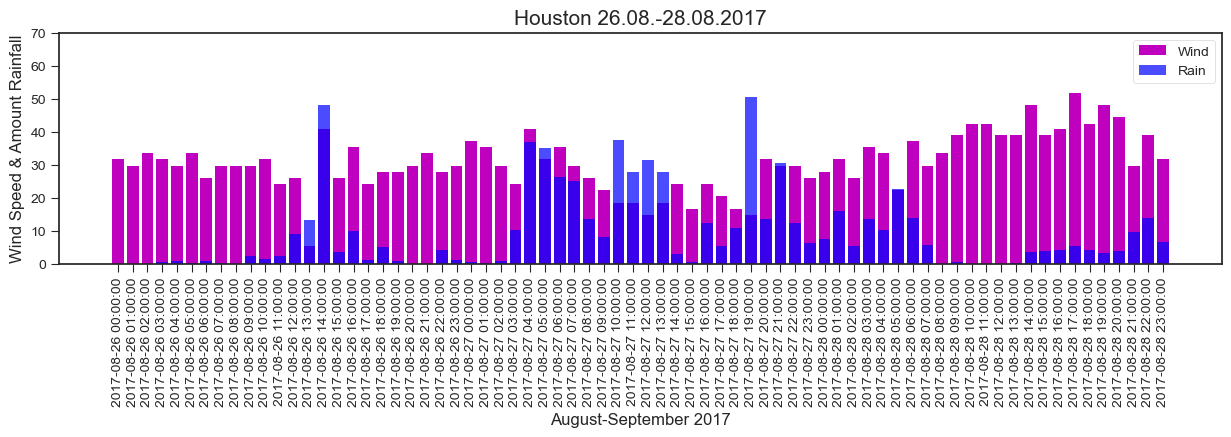

In [60]:
# Use predefined style
plt.style.use('seaborn-v0_8-ticks') 

# Set figure size
plt.figure(figsize=(15, 3))

#Set city and df
city = 'Houston 26.08.-28.08.2017'
df = df_h_harvey_1

# Create bar plot
plt.bar(df['time'], df['wspd'],
color = 'm',
label='Wind');
plt.bar(df['time'], df['prcp'],
color = 'b',
label='Rain',
alpha = 0.7);

# Label axes
plt.xlabel("August-September 2017", fontsize = 12)
plt.ylabel("Wind Speed & Amount Rainfall", fontsize = 12)
plt.ylim([0, 70])
plt.xticks(rotation=90)

# Set title
plt.title(city, fontsize = 15)

# Show graphic

plt.legend(loc='upper right', fontsize='medium', frameon=True)

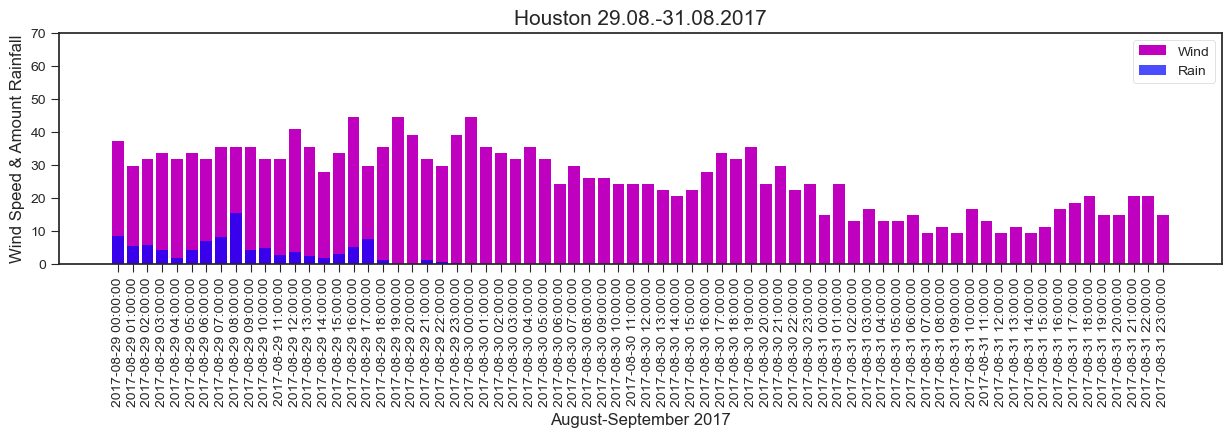

In [61]:
# Use predefined style
plt.style.use('seaborn-v0_8-ticks') 

# Set figure size
plt.figure(figsize=(15, 3))

#Set city and df
city = 'Houston 29.08.-31.08.2017'
df = df_h_harvey_2

# Create bar plot
plt.bar(df['time'], df['wspd'],
color = 'm',
label='Wind');
plt.bar(df['time'], df['prcp'],
color = 'b',
label='Rain',
alpha = 0.7);

# Label axes
plt.xlabel("August-September 2017", fontsize = 12)
plt.ylabel("Wind Speed & Amount Rainfall", fontsize = 12)
plt.ylim([0, 70])
plt.xticks(rotation=90)

# Set title
plt.title(city, fontsize = 15)

# Show graphic

plt.legend(loc='upper right', fontsize='medium', frameon=True)

/var/folders/l0/mwtmdpdj3f7_htr_n6695cgm0000gn/T/ipykernel_1600/2154140893.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meteostat_g1_df


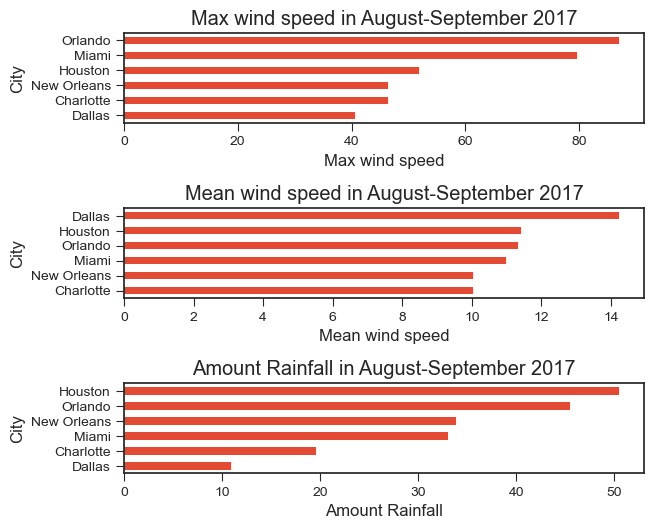

In [62]:
# Bar Chart

fig, axes = plt.subplots(3, 1, figsize =(6,5))
fig.tight_layout(h_pad=4)
(
    meteostat_g1_df
    .groupby('city') # aggregate data to level of airline
    .max()['wspd'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh(ax=axes[0]) # Make a bar chart based on the dataframe
)
axes[0].set_title('Max wind speed in August-September 2017')

axes[0].set_xlabel('Max wind speed');
axes[0].set_ylabel('City');

(
    meteostat_g1_df
    .groupby('city') # aggregate data to level of airline
    .mean()['wspd'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh(ax=axes[1]) # Make a bar chart based on the dataframe
)
axes[1].set_title('Mean wind speed in August-September 2017')

axes[1].set_xlabel('Mean wind speed');
axes[1].set_ylabel('City');

(
    meteostat_g1_df
    .groupby('city') # aggregate data to level of airline
    .max()['prcp'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh(ax=axes[2]) # Make a bar chart based on the dataframe
)
axes[2].set_title('Amount Rainfall in August-September 2017')

axes[2].set_xlabel('Amount Rainfall');
axes[2].set_ylabel('City');